<a href="https://colab.research.google.com/github/pauarmentaa/Regresion-No-Lineal-y-Regresion-Logistica/blob/main/a%C3%B1o2020_act7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Cargamos librerias
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
#Cargar archivo csv desde seaborn
df = pd.read_csv("Gastos_costos_2020.csv")
df

,Unnamed: 0,FECHA,FOLIO,PROVEEDOR,DESCRIPCION,TIPO GASTO,IMPORTE,IVA,TOTAL MX
0,0,2020-01-01,39408,ARSI RENTA SA DE CV,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",MAQUINARIA,0.00,2248.28,2248.28
1,1,2020-01-01,0001010100750847116902,"BANCO NACIONAL DE MEXICO, S.A.",COMISION COBRADA,COMISION BANCARIA,490.00,78.40,568.40
2,2,2020-01-01,0001010100752163714102,"BANCO NACIONAL DE MEXICO, S.A.",COMISION COBRADA,COMISION BANCARIA,195.00,31.20,226.20
3,3,2020-01-01,3663,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,HONORARIOS CONTABLES,10694.25,1711.08,12405.33
4,4,2020-01-01,2849,ELECTROTERMICA NACIONAL SA DE CV,Pago,COMPRAS,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
3337,3337,2020-12-01,125834,SERVICIO QUINTANA SUR S.A DE C.V,32011 MAGNA,COMBUSTIBLE,129.79,20.21,150.00
3338,3338,2020-12-01,37652,"CIA. PERIODISTICA DEL SOL DE QUERETARO, S.A. D...",82101504-PUBLICIDAD EN PERIODICOSCALOR Y CONTROL,PUBLICIDAD,2284.80,365.57,2650.37
3339,3339,2020-12-01,160,"SUPER Q, S. A. DE C. V.",REF VICTORIA GROSELLA 3 LT PET NR,ALIMENTOS,163.79,26.21,190.00
3340,3340,2020-12-01,634875,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISIONES E INTERESES,COMISION BANCARIA,0.00,0.00,0.00


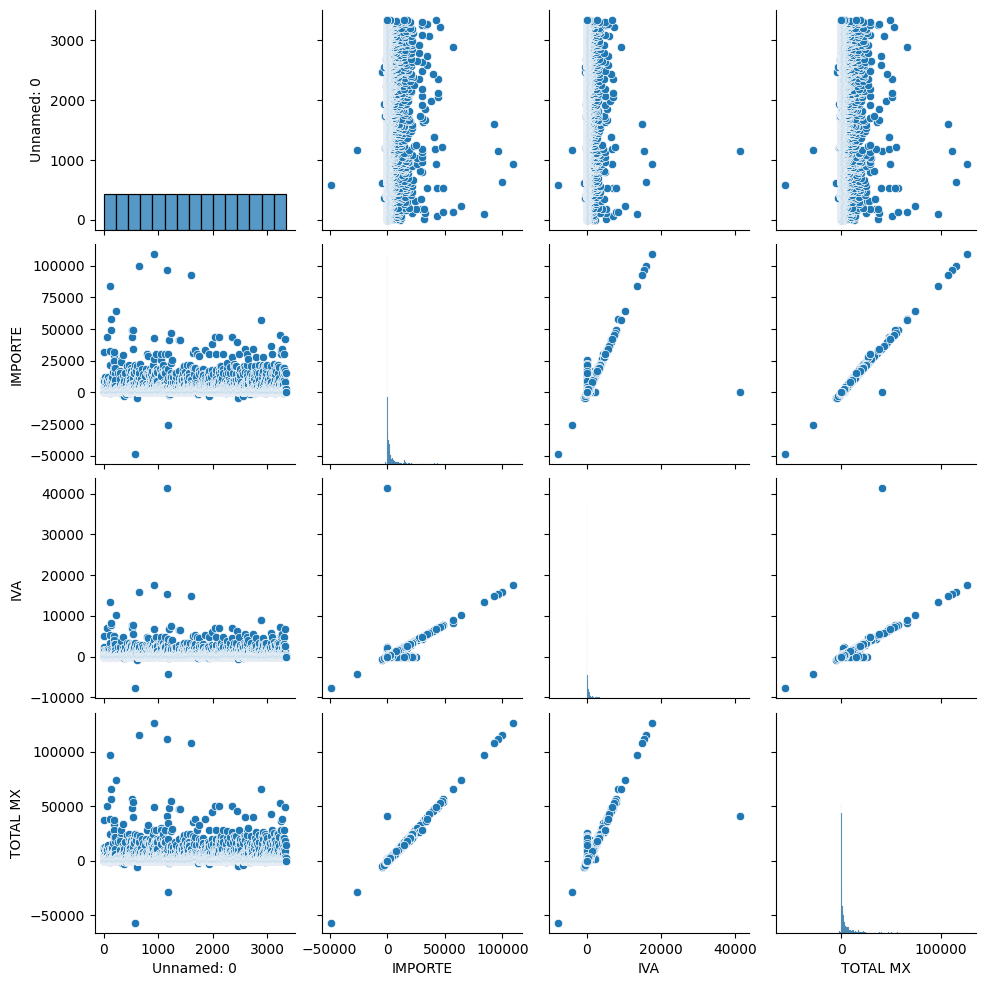

In [ ]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['TOTAL MX']]
Var_Dep= df['IVA']

In [ ]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

   ** Usamos las siguientes ecuaciones como funciones de ajuste.**

            y = ax^2 + bx + c

            y = ax^3 + bx + c

            y = ax^3 + bx^2 + c

            y = a*exp(bx) + c

**MODELO 1**

In [ ]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['TOTAL MX'], df['IVA'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([ 8.82337456e-09,  1.41669950e-01, -2.07172475e+01])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, df['TOTAL MX'], df['IVA'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,TOTAL MX
0,297.841067
1,59.810802
2,11.328947
3,1738.103077
4,-20.717248
...,...
3337,0.533443
3338,354.822516
3339,6.200361
3340,-20.717248


In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

0.762348376130595

**MODELO 2**

In [ ]:
def func2(x, a, b, c,m,e):
    return a*x**3 + b*x**2 + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df['TOTAL MX'], df['IVA'])

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

array([-2.15277248e-11,  3.75922166e-06,  2.57970186e+02,  1.00000000e+00,
        1.00000000e+00])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros2, _ = curve_fit(func2, df['TOTAL MX'], df['IVA'])
a2, b2, c2 = parametros2[ 0 ], parametros2[ 1 ], parametros2[ 2 ]
yfit2 = a2*np.exp(x*b2)+c2

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#yfit2 = yfit2.reshape(51, 1)
yfit2

,TOTAL MX
0,257.970186
1,257.970186
2,257.970186
3,257.970186
4,257.970186
...,...
3337,257.970186
3338,257.970186
3339,257.970186
3340,257.970186


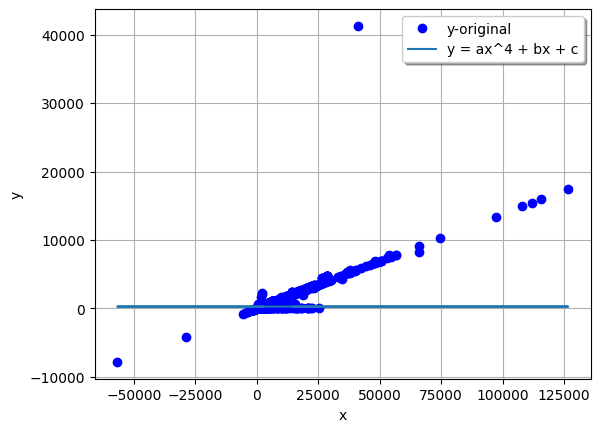

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="y = ax^4 + bx + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit2) 
R2

-0.026403610215124385